In [62]:
import statsmodels.api as sm 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math


In [3]:
df = pd.read_csv("Boston House Prices (1).csv", delimiter = ",", header = 0)
train, test = train_test_split(df, test_size=0.2)
nX= train[['Rooms']].to_numpy(dtype=float)
nY= train[['Distance']].to_numpy(dtype=float)
nZ= train[['Value']].to_numpy(dtype=float)
X1=nX



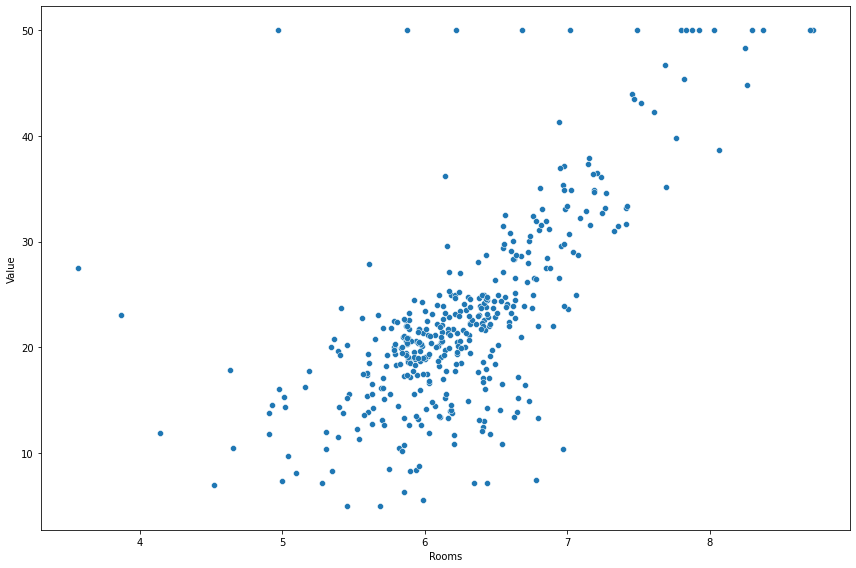

In [4]:
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(data=train, x='Rooms',y='Value')
plt.show()

In [5]:
nX= sm.add_constant(nX)
lm=sm.OLS(nZ,nX).fit()

In [45]:
y_pred = 9.5333*X1 - 37.1062
y_pred_meth= lm.predict(nX)


print(y_pred_meth.ndim)
y_pred_rehsape = np.reshape(y_pred_meth,(-1,1))
fin = np.hstack((X1, y_pred,y_pred_rehsape))

dataset = pd.DataFrame({'x': fin[:,0], 'y': fin[:,1],'z': fin[:,2]}, columns=['x', 'y','z'])
print(dataset)



         x          y          z
0    6.549  25.327382  25.327166
1    6.453  24.412185  24.411973
2    6.229  22.276726  22.276522
3    6.103  21.075530  21.075330
4    6.726  27.014776  27.014554
..     ...        ...        ...
399  6.037  20.446332  20.446135
400  6.051  20.579798  20.579601
401  5.836  18.530139  18.529949
402  5.344  13.839755  13.839583
403  5.707  17.300343  17.300158

[404 rows x 3 columns]


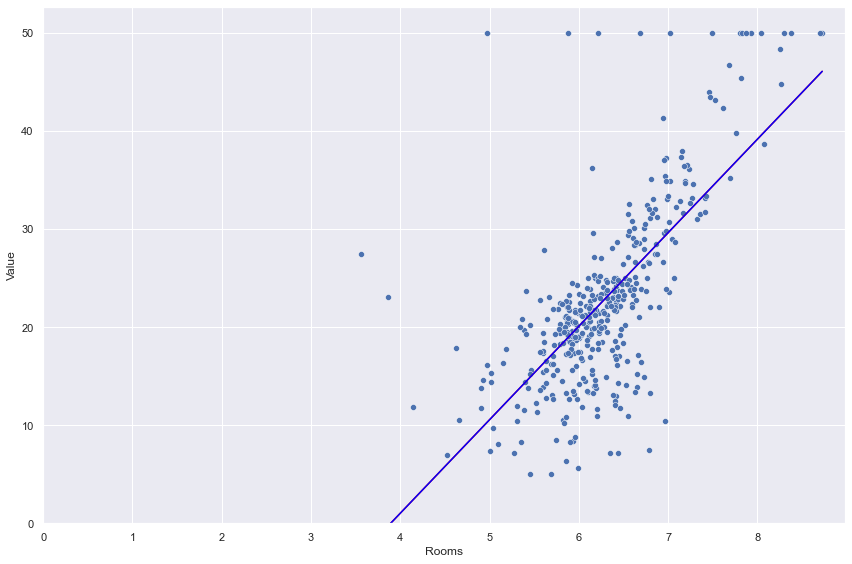

In [47]:
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(data=train, x='Rooms',y='Value')

#plotting the line
sns.lineplot(data=dataset ,x='x',y='y', color='red')
sns.lineplot(data=dataset ,x='x',y='z', color='blue')

#axes
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     388.2
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           5.71e-61
Time:                        22:58:09   Log-Likelihood:                -1331.5
No. Observations:                 404   AIC:                             2667.
Df Residuals:                     402   BIC:                             2675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1062      3.051    -12.161      0.000     -43.105     -31.108
x1             9.5333      0.484     19.703      0.000       8.582      10.484
==============================================================================
Omnibus:                      129.531   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              836.309
Skew:                           1.199   Prob(JB):                    2.50e-182
Kurtosis:                       9.628   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print('F-statistic:', lm.fvalue)
print('Probability of observing value at least as high as F-statistic:', lm.f_pvalue)
print('P-value :',lm.pvalues)

F-statistic: 388.20113495672695
Probability of observing value at least as high as F-statistic: 5.714265036085529e-61
P-value : [3.43040407e-29 5.71426504e-61]


In [10]:
x2=np.array(nY)
y2=np.array(nZ)
fin2=np.hstack((X1,nY,nZ))
corrmat=np.corrcoef(fin2,rowvar=False)

[[1.         0.203946   0.70090567]
 [0.203946   1.         0.2122851 ]
 [0.70090567 0.2122851  1.        ]]


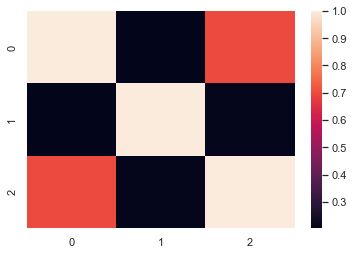

In [11]:
sns.set_theme()
ax = sns.heatmap(corrmat)
print(corrmat)

In [67]:
X= train[['Rooms','Distance']]
y=train['Value']
regr=linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)


[9.33257638 0.31713783]
-37.07658470765419


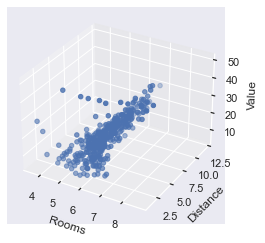

In [13]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = train['Rooms']
y = train['Distance']
z = train['Value']

ax.set_xlabel("Rooms")
ax.set_ylabel("Distance")
ax.set_zlabel("Value")

ax.scatter(x, y, z)
fig.savefig('3d scatter.jpg',dpi=1600)
plt.show()

In [23]:
print(nX)

[[1.    6.549]
 [1.    6.453]
 [1.    6.229]
 [1.    6.103]
 [1.    6.726]
 [1.    7.454]
 [1.    4.519]
 [1.    6.208]
 [1.    5.936]
 [1.    5.949]
 [1.    6.593]
 [1.    5.857]
 [1.    6.8  ]
 [1.    6.382]
 [1.    5.456]
 [1.    7.82 ]
 [1.    6.229]
 [1.    7.327]
 [1.    6.122]
 [1.    3.561]
 [1.    6.434]
 [1.    7.236]
 [1.    6.095]
 [1.    6.127]
 [1.    7.206]
 [1.    5.813]
 [1.    6.415]
 [1.    5.701]
 [1.    6.426]
 [1.    5.859]
 [1.    7.691]
 [1.    6.417]
 [1.    5.983]
 [1.    6.142]
 [1.    6.389]
 [1.    5.885]
 [1.    5.786]
 [1.    5.399]
 [1.    6.096]
 [1.    7.148]
 [1.    5.67 ]
 [1.    6.153]
 [1.    6.209]
 [1.    5.96 ]
 [1.    5.52 ]
 [1.    6.63 ]
 [1.    5.834]
 [1.    6.77 ]
 [1.    5.874]
 [1.    6.854]
 [1.    7.923]
 [1.    6.03 ]
 [1.    6.696]
 [1.    7.061]
 [1.    6.226]
 [1.    7.041]
 [1.    6.511]
 [1.    6.266]
 [1.    5.277]
 [1.    5.961]
 [1.    6.552]
 [1.    7.61 ]
 [1.    6.495]
 [1.    5.942]
 [1.    5.888]
 [1.    6.315]
 [1.    6.

In [61]:
nX1= test[['Rooms']].to_numpy(dtype=float)
nZ1 = test[['Value']].to_numpy(dtype=float)

nX1 =sm.add_constant(nX1)
y_pred_test = lm.predict(nX1)


y_pred_test_reshape = np.reshape(y_pred_test,(-1,1))
print(y_pred_test_reshape)

[[23.38238027]
 [32.36271479]
 [21.54246035]
 [17.31922447]
 [23.67791145]
 [23.63977839]
 [19.4737421 ]
 [46.59587769]
 [ 4.53511768]
 [19.76927328]
 [21.1611298 ]
 [18.67294794]
 [22.48625347]
 [25.01256838]
 [37.44394441]
 [24.7170372 ]
 [20.1315373 ]
 [22.21932208]
 [22.08585639]
 [21.12299674]
 [18.9208128 ]
 [17.30969121]
 [27.23381885]
 [30.6467273 ]
 [18.21535127]
 [19.33074314]
 [26.90968788]
 [19.75974001]
 [31.56192063]
 [28.12041239]
 [21.33272854]
 [ 2.342467  ]
 [24.70750394]
 [24.48823887]
 [23.7160445 ]
 [29.15953815]
 [19.93133876]
 [23.68744471]
 [23.28704763]
 [20.17920362]
 [39.54126245]
 [21.30412875]
 [28.03461301]
 [24.059242  ]
 [28.29201114]
 [32.00045077]
 [41.62904723]
 [31.02805786]
 [15.62230351]
 [27.94881364]
 [14.41157901]
 [32.80124493]
 [37.75854212]
 [20.28406952]
 [42.37264181]
 [10.20740966]
 [14.40204574]
 [24.68843741]
 [23.20124825]
 [13.15318818]
 [15.94643448]
 [17.06182635]
 [26.09936046]
 [21.93332417]
 [19.26401029]
 [16.4421642 ]
 [33.37324

In [56]:
X_multi= test[['Rooms','Distance']]

In [59]:
y_multi_pred = regr.predict(X_multi)

y_multi_pred_reshape = np.reshape(y_multi_pred,(-1,1))
print(y_multi_pred_reshape)

[[24.62110398]
 [33.24785982]
 [20.94449045]
 [16.717872  ]
 [23.86785493]
 [23.1286986 ]
 [19.73893239]
 [45.46748838]
 [ 4.14462885]
 [19.82169038]
 [20.75985269]
 [18.19649742]
 [21.95841923]
 [26.44134956]
 [37.01262277]
 [24.07259863]
 [19.65308258]
 [21.43962288]
 [21.80918832]
 [22.48149566]
 [18.54031137]
 [17.69100072]
 [26.64587478]
 [31.56799607]
 [17.68440848]
 [19.41465495]
 [26.44080226]
 [19.86468555]
 [30.8157898 ]
 [27.41457195]
 [20.58215883]
 [ 1.90220209]
 [24.16693841]
 [23.85629154]
 [23.08944331]
 [28.70170708]
 [19.35266498]
 [24.45003358]
 [22.71466951]
 [20.97758893]
 [38.97714955]
 [20.77720414]
 [27.35515695]
 [23.64046722]
 [27.86944121]
 [33.33328238]
 [42.82581518]
 [31.54589168]
 [15.05166263]
 [27.17786181]
 [13.86141465]
 [31.96004726]
 [37.83524907]
 [20.23291841]
 [41.94640647]
 [ 9.79671251]
 [13.76645486]
 [24.73022118]
 [22.68151352]
 [12.67543612]
 [15.51361679]
 [17.56864411]
 [26.42109587]
 [21.33391283]
 [18.85329163]
 [15.80583725]
 [32.69699

In [71]:
mse_single= metrics.mean_squared_error(nZ1,y_pred_test_reshape)
rmse_single = math.sqrt(mse_single)
mse_multi = metrics.mean_squared_error(nZ1,y_multi_pred_reshape)
rmse_multi = math.sqrt(mse_multi)
print('RMSE for 1 variable regression (statmodels_library):',rmse_single)
print('RMSE for multi-variable(2 varibale: Rooms, Distance) linear regression(Sklearn):',rmse_multi)


RMSE for 1 variable regression (statmodels_library): 6.935781796495357
RMSE for multi-variable(2 varibale: Rooms, Distance) linear regression(Sklearn): 6.729213202843873
